In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Prepare url information to get data using requests
data_gov_url = 'https://data.gov.sg/api/action/datastore_search'

resale_flat_prices_resource_ids = [
    'adbbddd3-30e2-445f-a123-29bee150a6fe', # 1990 - 1999
    '8c00bf08-9124-479e-aeca-7cc411d884c4', # 2000 - Feb 2012
    '83b2fc37-ce8c-4df4-968b-370fd818138b', # Mar 2012 - Dec 2014
]

In [3]:
# Call API to get resale flat prices information
resale_flat_prices = []

for resource_id in resale_flat_prices_resource_ids:

    url = data_gov_url + "?" + "resource_id=" + resource_id + "&limit=1000000000" 
    res = requests.get(url)
    records = res.json()['result']['records']

    resale_flat_prices.extend(records)

In [4]:
# Save resale flat prices into a data frame
df = pd.DataFrame(resale_flat_prices)

In [28]:
# Save data frame into a csv file
df.to_csv('HDB resale flat prices (1990-2014).csv', index=False)

In [23]:
# Transform data into a data frame for me to visualise
df['month'] = pd.to_datetime(df['month'])
df['resale_price'] = df['resale_price'].astype(float)

mean_resale_price_df = df.groupby(['month']).agg({'resale_price': 'mean'}).reset_index()

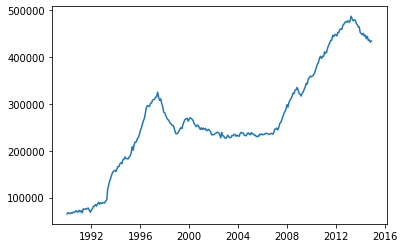

In [26]:
# Create visualisation showing trend of resale prices
x = mean_resale_price_df['month']
y = mean_resale_price_df['resale_price']

figure, ax = plt.subplots()
ax.plot(x,y)

In [27]:
# Use another library to automate statistical analysis and visualisations
from pandas_profiling import ProfileReport

profile = ProfileReport(df)
profile

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]
